In [93]:
import sqlite3
import pandas as pd

In [94]:
# SQLiteデータベースへの接続
conn = sqlite3.connect('scraping_data.sqlite')

In [95]:
# SQLクエリを実行してデータを取得
query = "SELECT thyme, rain, tem FROM scrape_data"
df = pd.read_sql_query(query, conn)


In [96]:
print(df.head())

              thyme  rain  tem
0  2024/01/05/00:10     0  4.5
1  2024/01/05/00:20     0  3.8
2  2024/01/05/00:30     0  4.2
3  2024/01/05/00:40     0  3.4
4  2024/01/05/00:50     0  3.3


In [97]:
print(df.describe())

        rain         tem
count  720.0  720.000000
mean     0.0    5.750833
std      0.0    3.558351
min      0.0   -0.600000
25%      0.0    2.800000
50%      0.0    5.100000
75%      0.0    8.700000
max      0.0   15.600000


In [ ]:
# thyme列を日時型に変換
df['thyme'] = pd.to_datetime(df['thyme'].str.replace('24:00', '00:00'), format='%Y/%m/%d/%H:%M')

# thyme列をインデックスに設定
df.set_index('thyme', inplace=True)

# 表を表示
print(df.head())


In [98]:
# SQLiteデータベースへの接続
conn = sqlite3.connect('aircon.sqlite')

In [99]:
# SQLクエリを実行してデータを取得
query = "SELECT thyme, ON_OFF FROM aircon"
local = pd.read_sql_query(query, conn)


In [100]:
print(local.head())

                 thyme ON_OFF
0  2024-01-05 00:10:00    OFF
1  2024-01-05 00:20:00    OFF
2  2024-01-05 00:30:00    OFF
3  2024-01-05 00:40:00    OFF
4  2024-01-05 00:50:00    OFF


In [101]:
print(local.describe())

                      thyme ON_OFF
count                   720    720
unique                  719      2
top     2024-01-09 00:00:00    OFF
freq                      2    563


In [103]:
local

,thyme,ON_OFF
0,2024-01-05 00:10:00,OFF
1,2024-01-05 00:20:00,OFF
2,2024-01-05 00:30:00,OFF
3,2024-01-05 00:40:00,OFF
4,2024-01-05 00:50:00,OFF
...,...,...
715,2024-01-09 23:20:00,ON
716,2024-01-09 23:30:00,OFF
717,2024-01-09 23:40:00,OFF
718,2024-01-09 23:50:00,OFF


In [102]:
df

,thyme,rain,tem
0,2024/01/05/00:10,0,4.5
1,2024/01/05/00:20,0,3.8
2,2024/01/05/00:30,0,4.2
3,2024/01/05/00:40,0,3.4
4,2024/01/05/00:50,0,3.3
...,...,...,...
715,2024/01/09/23:20,0,1.5
716,2024/01/09/23:30,0,1.7
717,2024/01/09/23:40,0,1.4
718,2024/01/09/23:50,0,1.5


In [106]:
mar_df = pd.concat([df, local.iloc[:, 1]], axis=1)

# 結果の表示
print(mar_df)

                thyme  rain  tem ON_OFF
0    2024/01/05/00:10     0  4.5    OFF
1    2024/01/05/00:20     0  3.8    OFF
2    2024/01/05/00:30     0  4.2    OFF
3    2024/01/05/00:40     0  3.4    OFF
4    2024/01/05/00:50     0  3.3    OFF
..                ...   ...  ...    ...
715  2024/01/09/23:20     0  1.5     ON
716  2024/01/09/23:30     0  1.7    OFF
717  2024/01/09/23:40     0  1.4    OFF
718  2024/01/09/23:50     0  1.5    OFF
719  2024/01/09/24:00     0  1.5    OFF

[720 rows x 4 columns]


In [113]:
# 'ON' を15に、'OFF' を値無しに変換
mar_df['ON_OFF'] = mar_df['ON_OFF'].map({'ON': 15, 'OFF': None})

# 結果の表示
print(mar_df)

                thyme  rain  tem  ON_OFF
0    2024/01/05/00:10     0  4.5     NaN
1    2024/01/05/00:20     0  3.8     NaN
2    2024/01/05/00:30     0  4.2     NaN
3    2024/01/05/00:40     0  3.4     NaN
4    2024/01/05/00:50     0  3.3     NaN
..                ...   ...  ...     ...
715  2024/01/09/23:20     0  1.5    15.0
716  2024/01/09/23:30     0  1.7     NaN
717  2024/01/09/23:40     0  1.4     NaN
718  2024/01/09/23:50     0  1.5     NaN
719  2024/01/09/24:00     0  1.5     NaN

[720 rows x 4 columns]


In [116]:
mar_df['rain'] = mar_df['rain'].astype(float)
mar_df['tem'] = mar_df['tem'].astype(float)

/Users/araiyuya/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/araiyuya/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/araiyuya/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/araiyuya/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25240 (\N{CJK UNIFIED IDEOGRAPH-6298}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/araiyuya/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12428 (\N{HIRAGANA LETTER RE}

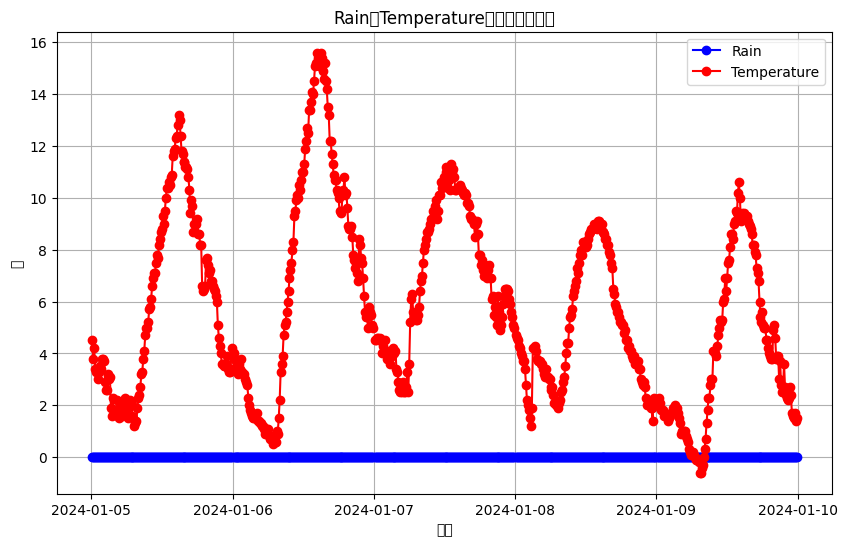

In [118]:
import pandas as pd
import matplotlib.pyplot as plt



# 'thyme' 列を datetime 型に変換
mar_df['thyme'] = pd.to_datetime(mar_df['thyme'], format='%Y/%m/%d/%H:%M', errors='coerce')

# グラフの描画
plt.figure(figsize=(10, 6))

# 'rain' 列の折れ線グラフ
plt.plot(mar_df['thyme'], mar_df['rain'], marker='o', linestyle='-', color='b', label='Rain')

# 'tem' 列の折れ線グラフ
plt.plot(mar_df['thyme'], mar_df['tem'], marker='o', linestyle='-', color='r', label='Temperature')

# グラフにタイトルやラベルを追加（適宜変更してください）
plt.title('RainとTemperatureの折れ線グラフ')
plt.xlabel('時刻')
plt.ylabel('値')

# 凡例を表示
plt.legend()

# グリッドを表示
plt.grid(True)

# グラフを表示
plt.show()›

/Users/araiyuya/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/araiyuya/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/araiyuya/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25240 (\N{CJK UNIFIED IDEOGRAPH-6298}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/araiyuya/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12428 (\N{HIRAGANA LETTER RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/araiyuya/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32218 (\N{CJK UNIFIED IDEOGRAPH-7DDA}

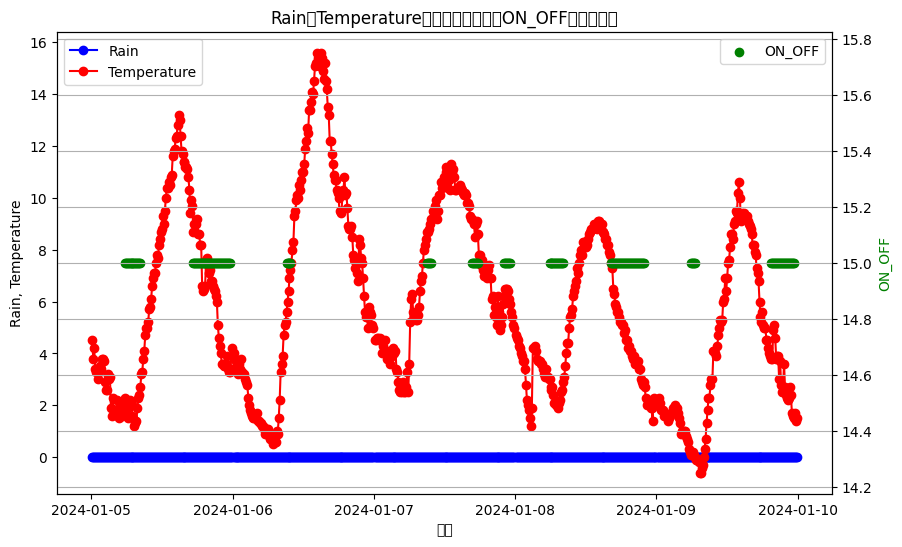

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# 'thyme' 列を datetime 型に変換
mar_df['thyme'] = pd.to_datetime(mar_df['thyme'], format='%Y/%m/%d/%H:%M', errors='coerce')

# グラフの描画
fig, ax1 = plt.subplots(figsize=(10, 6))

# 'rain' 列と 'tem' 列の折れ線グラフ
ax1.plot(mar_df['thyme'], mar_df['rain'], marker='o', linestyle='-', color='b', label='Rain')
ax1.plot(mar_df['thyme'], mar_df['tem'], marker='o', linestyle='-', color='r', label='Temperature')

# タイトルやラベルを設定
plt.title('RainとTemperatureの折れ線グラフとON_OFFのプロット')
plt.xlabel('時刻')
ax1.set_ylabel('Rain, Temperature', color='black')
ax1.legend(loc='upper left')

# 2軸目を設定
ax2 = ax1.twinx()
# 'ON_OFF' 列のプロット
ax2.scatter(mar_df['thyme'], mar_df['ON_OFF'], color='g', label='ON_OFF')

# 2軸目のラベルを設定
ax2.set_ylabel('ON_OFF', color='g')
ax2.legend(loc='upper right')

# グリッドを表示
plt.grid(True)

# グラフを表示
plt.show()


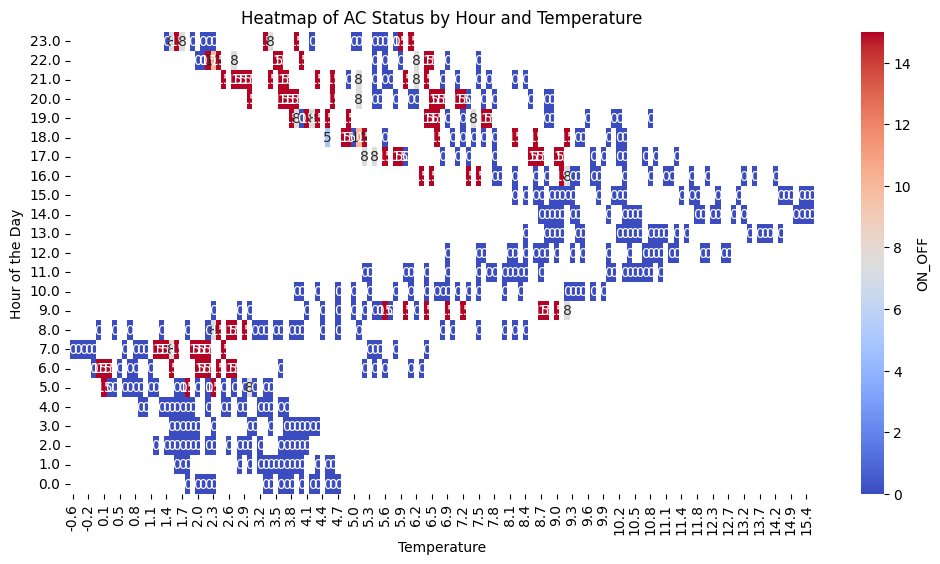

In [139]:
import seaborn as sns

# NaNを0に置き換える（または適切な値に置き換える）
mar_df['ON_OFF'] = mar_df['ON_OFF'].fillna(0)

# ヒートマップ
heatmap_data = mar_df.pivot_table(index='hour', columns='tem', values='ON_OFF', aggfunc='mean').sort_index(ascending=False)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f", cbar_kws={'label': 'ON_OFF'})
plt.title('Heatmap of AC Status by Hour and Temperature')
plt.xlabel('Temperature')
plt.ylabel('Hour of the Day')
plt.show()
